In [10]:
#%pip install tensorflow
#%pip install keras
#%pip install matplotlib


In [1]:
import sys, numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])
one_hot_labels = np.zeros((len(labels),10))

for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

np.random.seed(1)
relu = lambda x:(x>=0) * x
relu2deriv = lambda x: x>=0
alpha, iterations, hidden_size, pixels_per_image, num_labels = (0.005, 350, 40, 784, 10)
weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    error, correct_cnt = (0.0, 0)

    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)
        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))
        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\r"+ " I:"+str(j)+" Error:" + str(error/float(len(images)))[0:5] + " Correct:" + str(correct_cnt/float(len(images))))

 I:349 Error:0.108 Correct:1.099

In [2]:
# Show dimensionality
print(layer_2[0])
print(np.argmax(layer_2))

[-3.27533080e-02 -5.37572964e-03  6.82407035e-02  6.95686725e-02
 -2.67865372e-03 -1.50480362e-01  9.74881207e-01  1.15799228e-02
 -8.82299563e-06  1.97680831e-02]
6


<Figure size 640x480 with 0 Axes>

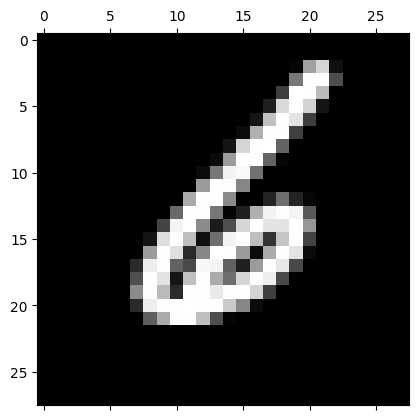

In [3]:
# Visualize pictures with plot

import matplotlib.pyplot as plit
plit.gray()
plit.matshow(x_train[i])
plit.show()

In [4]:
error, correct_cnt = (0.0, 0)

for i in range(len(test_images)):

    layer_0 = test_images[i:i+1]
    layer_1 = relu(np.dot(layer_0,weights_0_1))
    layer_2 = np.dot(layer_1,weights_1_2)

    error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
    correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

print(" Test-Err:" + str(error/float(len(test_images)))[0:5] + " Test-Acc:" + str(correct_cnt/float(len(test_images))))

 Test-Err:0.653 Test-Acc:0.7073


In [5]:
# Modify with Dropout mask
# multiply by (1/percentage of turned on nodes)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    error, correct_cnt = (0.0, 0)

    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))     #Here's Relu
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2

        layer_2 = np.dot(layer_1,weights_1_2)
        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))
        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\r"+ " I:"+str(j)+" Error:" + str(error/float(len(images)))[0:5] + " Correct:" + str(correct_cnt/float(len(images))))

 I:349 Error:0.590 Correct:0.701

In [6]:
#print(dropout_mask)

In [7]:
error, correct_cnt = (0.0, 0)

for i in range(len(test_images)):

    layer_0 = test_images[i:i+1]
    layer_1 = relu(np.dot(layer_0,weights_0_1))
    layer_2 = np.dot(layer_1,weights_1_2)

    error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
    correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

print(" Test-Err:" + str(error/float(len(test_images)))[0:5] + " Test-Acc:" + str(correct_cnt/float(len(test_images))))

 Test-Err:0.452 Test-Acc:0.7834


In [8]:
## Now let's add batch code.
weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

alpha = .001 # notice it's bigger
batch_size = 100

for j in range(iterations):
    error, correct_cnt = (0.0, 0)

    for i in range(int(len(images) / batch_size)): # modify here
        batch_start, batch_end = ((i * batch_size),((i+1)*batch_size))
        
        layer_0 = images[batch_start:batch_end] # modify here
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)
        error += np.sum((labels[batch_start:batch_end] - layer_2) ** 2)
        for k in range(batch_size): #modify Here
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))
            layer_2_delta = (labels[batch_start:batch_end] - layer_2) / batch_size
            layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
            layer_1_delta *= dropout_mask
            weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
            weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\r"+ " I:"+str(j)+" Error:" + str(error/float(len(images)))[0:5] + " Correct:" + str(correct_cnt/float(len(images))))

 I:349 Error:0.468 Correct:0.767

In [9]:
error, correct_cnt = (0.0, 0)

for i in range(len(test_images)):

    layer_0 = test_images[i:i+1]
    layer_1 = relu(np.dot(layer_0,weights_0_1))
    layer_2 = np.dot(layer_1,weights_1_2)

    error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
    correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

print(" Test-Err:" + str(error/float(len(test_images)))[0:5] + " Test-Acc:" + str(correct_cnt/float(len(test_images))))

 Test-Err:0.460 Test-Acc:0.7641


In [13]:
import numpy as np
# Add activation functions
def tanh(x):
    return np.tanh(x)

def tanh2deriv(output):
    return 1 - (output**2)

def softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp, axis = 1, keepdims = True)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

alpha = 2

iterations = 350
for j in range(iterations):
    correct_cnt = 0
    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end=((i * batch_size),((i+1)*batch_size))
        layer_0 = images[batch_start:batch_end]
        layer_1 = tanh(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2,size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = softmax(np.dot(layer_1,weights_1_2))

        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == \
                          np.argmax(labels[batch_start+k:batch_start+k+1]))
        layer_2_delta = (labels[batch_start:batch_end]-layer_2)\
                                           / (batch_size * layer_2.shape[0])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) \
                                                       * tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
    
    test_correct_cnt = 0

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = tanh(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)
        test_correct_cnt += int(np.argmax(layer_2) == \
                                               np.argmax(test_labels[i:i+1]))
    if(j % 10 == 0):
        sys.stdout.write("\n"+ "I:" + str(j) + \
         " Test-Acc:"+str(test_correct_cnt/float(len(test_images)))+\
         " Train-Acc:" + str(correct_cnt/float(len(images))))


I:0 Test-Acc:0.1684 Train-Acc:0.128
I:10 Test-Acc:0.4931 Train-Acc:0.396
I:20 Test-Acc:0.5814 Train-Acc:0.528
I:30 Test-Acc:0.6429 Train-Acc:0.601
I:40 Test-Acc:0.6871 Train-Acc:0.647
I:50 Test-Acc:0.7127 Train-Acc:0.695
I:60 Test-Acc:0.7343 Train-Acc:0.728
I:70 Test-Acc:0.7529 Train-Acc:0.742
I:80 Test-Acc:0.7699 Train-Acc:0.764
I:90 Test-Acc:0.7821 Train-Acc:0.771
I:100 Test-Acc:0.7909 Train-Acc:0.798
I:110 Test-Acc:0.8008 Train-Acc:0.794
I:120 Test-Acc:0.807 Train-Acc:0.797
I:130 Test-Acc:0.8113 Train-Acc:0.824
I:140 Test-Acc:0.8135 Train-Acc:0.826
I:150 Test-Acc:0.8189 Train-Acc:0.829
I:160 Test-Acc:0.8213 Train-Acc:0.829
I:170 Test-Acc:0.8242 Train-Acc:0.85
I:180 Test-Acc:0.827 Train-Acc:0.842
I:190 Test-Acc:0.8286 Train-Acc:0.863
I:200 Test-Acc:0.8314 Train-Acc:0.857
I:210 Test-Acc:0.8325 Train-Acc:0.858
I:220 Test-Acc:0.8325 Train-Acc:0.868
I:230 Test-Acc:0.8329 Train-Acc:0.857
I:240 Test-Acc:0.8325 Train-Acc:0.862
I:250 Test-Acc:0.8332 Train-Acc:0.851
I:260 Test-Acc:0.8318 Tra